# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [3]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

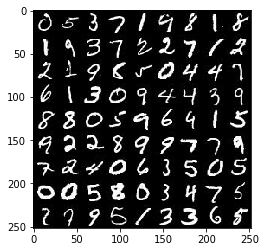

In [4]:
show_n_images = 99

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

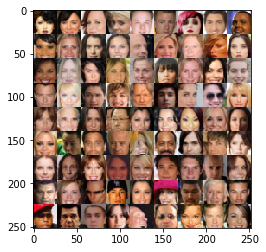

In [5]:
show_n_images = 99

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [7]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
#     print( str(image_width) + "X" + str(image_height) )
#     print( image_channels )
#     print( z_dim )
#     print( "\n" )
    
    realInputs      = tf.placeholder( tf.float32, [ None, image_width, image_height, image_channels ] , name="real_inputs" )
    generatedInputs = tf.placeholder( tf.float32, [ None, z_dim ], name="z_inputs")
    learningRate    = tf.placeholder( dtype=tf.float32, name="learning_rate" ) 
    
#     print( "\n" )
#     print( realInputs )
#     print( generatedInputs )
#     print( learningRate )
#     print( "\n" )

    return realInputs, generatedInputs, learningRate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [8]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
#     print( images )
#     print( reuse )
#     print( "\n" )

    with tf.variable_scope( 'discriminator', reuse=reuse ):
        alpha = 0.03
        # Input layer 
        # 28x28x3
        conv1      = tf.layers.conv2d( images, 56,  5, strides=2, padding='same' )
        max1       = tf.maximum( alpha * conv1, conv1 )
        # 16x16x56
        conv2      = tf.layers.conv2d(   max1, 112, 5, strides=2, padding='same' )
        conv2Batch = tf.layers.batch_normalization( conv2, training=True )
        max2       = tf.maximum( alpha * conv2Batch, conv2Batch )
        # 8x8x112
        conv3      = tf.layers.conv2d(   max2, 224, 5, strides=2, padding='same' )
        conv3Batch = tf.layers.batch_normalization( conv3, training=True )
        max3       = tf.maximum( alpha * conv3Batch, conv3Batch )
        # 4x4x224
        Flatten    = tf.reshape( max3, ( -1, 4*4*224 ) )
        discriminatorLogits     = tf.layers.dense( Flatten, 1 )
        discriminatorOutput     = tf.sigmoid( discriminatorLogits )
        
#         print( discriminatorLogits )
#         print( discriminatorOutput )
#         print( "\n" )
        
        return discriminatorOutput, discriminatorLogits
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [9]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
#     print( z )
#     print( out_channel_dim )
#     print( "\n" )

    with tf.variable_scope( 'generator', reuse=not is_train ):
        alpha = 0.03
        # Fully connected Layer 
        # Convolution Layer
        # 7x7x448
        conv1        = tf.layers.dense( z, 7*7*448 )
        # Reshape
        conv1Reshape = tf.reshape( conv1, ( -1, 7, 7, 448 ))
        conv1Batch   = tf.layers.batch_normalization( conv1Reshape, training=is_train )
        max1         = tf.maximum( alpha * conv1Batch, conv1Batch )
        # 14x14x224 
        conv2Reshape = tf.layers.conv2d_transpose( max1, 224, 5, strides=2, padding='same')
        conv2Batch   = tf.layers.batch_normalization( conv2Reshape, training=is_train)
        max2         = tf.maximum( alpha * conv2Batch, conv2Batch)
#         # 28x28x112 
#         conv3Reshape = tf.layers.conv2d_transpose( max2, 112, out_channel_dim, strides=2, padding='same')
#         conv3Batch   = tf.layers.batch_normalization( conv3Reshape, training=is_train)
#         max3         = tf.maximum( alpha * conv3Batch, conv3Batch)
        # Logits
        generatorLogits = tf.layers.conv2d_transpose(max2, out_channel_dim, 5, strides=2, padding='same')
        # 28x28x3
        generatorOutput = tf.tanh( generatorLogits )
        
#         print( generatorLogits )
#         print( generatorOutput )
#         print( "\n" )
    
    return generatorOutput


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [10]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
#     print( input_real )
#     print( input_z )
#     print( out_channel_dim )
#     print( "\n" )
    
    # G and D Models
    generatorModel                                   = generator( input_z, out_channel_dim, is_train=True )
    discriminatorRealModel, discriminatorRealLogits  = discriminator( input_real )
    discriminatorFakeModel, discriminatorFakeLogits  = discriminator( generatorModel, reuse=True)
    
    # G and D Losses
    discriminatorRealLoss = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits( logits=discriminatorRealLogits,
                                                                                    labels=tf.ones_like( discriminatorRealModel ) ) )
    discriminatorFeakLoss = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits( logits=discriminatorFakeLogits,
                                                                                    labels=tf.zeros_like( discriminatorFakeModel ) ) )
    generatorLoss         = tf.reduce_mean( tf.nn.sigmoid_cross_entropy_with_logits( logits=discriminatorFakeLogits,
                                                                                    labels=tf.ones_like( discriminatorFakeModel ) ) )
    discriminatorLoss     = discriminatorRealLoss + discriminatorFeakLoss
    
#     print( generatorLoss )
#     print( discriminatorLoss )
#     print( "\n" )
    
    return discriminatorLoss, generatorLoss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [11]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
#     print( d_loss )
#     print( g_loss )
#     print( learning_rate )
#     print( beta1 )
#     print( "\n" )
    
    # Get all variables
    trainableVariables     = tf.trainable_variables()
    discriminatorVariables = [variable for variable in trainableVariables if variable.name.startswith('discriminator') ]
    generatorVariables     = [variable for variable in trainableVariables if variable.name.startswith('generator') ]

    # Optimizers
    with tf.control_dependencies( tf.get_collection( tf.GraphKeys.UPDATE_OPS ) ):
        discriminatorTrainOperation = tf.train.AdamOptimizer( learning_rate, beta1=beta1 ).minimize( d_loss, var_list=discriminatorVariables )
        generatorTrainOperation     = tf.train.AdamOptimizer( learning_rate, beta1=beta1 ).minimize( g_loss, var_list=generatorVariables )

    return discriminatorTrainOperation, generatorTrainOperation


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [15]:
import pickle as pkl
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
#     print( epoch_count )
#     print( batch_size )
#     print( z_dim )
#     print( learning_rate )
#     print( beta1 )
#     print( get_batches )
#     print( data_shape )
#     print( data_image_mode )
#     print( "\n" )
    
    # Model Inputs
    realInputs, generatedInputs, learningRate  = model_inputs( data_shape[1], data_shape[2], data_shape[3], z_dim )
    # Model Loss
    discriminatorLoss, generatorLoss           = model_loss( realInputs, generatedInputs, data_shape[3] )
    # Model Optimizers
    discriminatorOptimazer, generatorOptimazer = model_opt( discriminatorLoss, generatorLoss, learningRate, beta1)

#     print( discriminatorOptimazer )
#     print( generatorOptimazer )
#     print( "\n" )
    
    steps = 0
    with tf.Session() as sess:
        sess.run( tf.global_variables_initializer() )
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                image_input = 1 * batch_images
                steps+=1
                # Sample Random Noise
                sampleBatch = np.random.uniform( -1, 1, size=( batch_size, z_dim ) )
                # Optimizers
                _ = sess.run(discriminatorOptimazer, feed_dict={ realInputs: image_input, generatedInputs: sampleBatch, learningRate: learning_rate})
                #_ = sess.run(generatorOptimazer,     feed_dict={ realInputs: image_input, generatedInputs: sampleBatch, learningRate: learning_rate})
                _ = sess.run(generatorOptimazer,     feed_dict={ realInputs: image_input, generatedInputs: sampleBatch, learningRate: learning_rate})
                
                if steps % 2 == 0:
                    # get the losses and print them out
                    discriminatorTrainLoss = sess.run( discriminatorLoss, { generatedInputs: sampleBatch, realInputs: batch_images, learningRate: learning_rate })
                    generatorTrainLoss     = generatorLoss.eval( { generatedInputs: sampleBatch } )
                    print("Epoch {}/{}...".format( epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(discriminatorTrainLoss),
                          "Generator Loss: {:.4f}".format(generatorTrainLoss))
                
                if steps == 1 or steps % 25 == 0:
                    n_images = 9
                    show_generator_output(sess, n_images, generatedInputs, data_shape[3], data_image_mode)

                
                
                
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

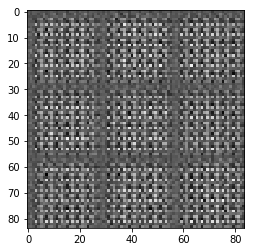

Epoch 1/2... Discriminator Loss: 1.6920... Generator Loss: 0.3000
Epoch 1/2... Discriminator Loss: 3.2119... Generator Loss: 0.0503
Epoch 1/2... Discriminator Loss: 2.8082... Generator Loss: 0.0807
Epoch 1/2... Discriminator Loss: 3.8505... Generator Loss: 0.0288
Epoch 1/2... Discriminator Loss: 3.6282... Generator Loss: 0.0457
Epoch 1/2... Discriminator Loss: 3.7191... Generator Loss: 0.0421
Epoch 1/2... Discriminator Loss: 3.0748... Generator Loss: 0.0763
Epoch 1/2... Discriminator Loss: 3.0104... Generator Loss: 0.0724
Epoch 1/2... Discriminator Loss: 2.6897... Generator Loss: 0.1017
Epoch 1/2... Discriminator Loss: 2.5352... Generator Loss: 0.1410
Epoch 1/2... Discriminator Loss: 2.5432... Generator Loss: 0.1730
Epoch 1/2... Discriminator Loss: 2.3579... Generator Loss: 0.1727


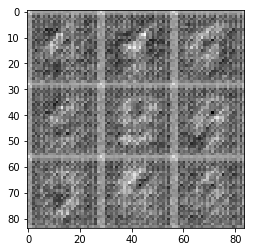

Epoch 1/2... Discriminator Loss: 2.3494... Generator Loss: 0.1541
Epoch 1/2... Discriminator Loss: 2.4931... Generator Loss: 0.1125
Epoch 1/2... Discriminator Loss: 2.4309... Generator Loss: 0.1227
Epoch 1/2... Discriminator Loss: 2.2122... Generator Loss: 0.1832
Epoch 1/2... Discriminator Loss: 2.1946... Generator Loss: 0.1877
Epoch 1/2... Discriminator Loss: 2.2159... Generator Loss: 0.1893
Epoch 1/2... Discriminator Loss: 2.1811... Generator Loss: 0.1829
Epoch 1/2... Discriminator Loss: 2.1925... Generator Loss: 0.1749
Epoch 1/2... Discriminator Loss: 2.1189... Generator Loss: 0.2098
Epoch 1/2... Discriminator Loss: 2.1511... Generator Loss: 0.1970
Epoch 1/2... Discriminator Loss: 2.0673... Generator Loss: 0.2019
Epoch 1/2... Discriminator Loss: 1.9420... Generator Loss: 0.2514
Epoch 1/2... Discriminator Loss: 1.8467... Generator Loss: 0.3016


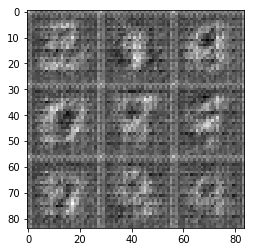

Epoch 1/2... Discriminator Loss: 1.9027... Generator Loss: 0.3206
Epoch 1/2... Discriminator Loss: 1.8498... Generator Loss: 0.3000
Epoch 1/2... Discriminator Loss: 1.8493... Generator Loss: 0.2884
Epoch 1/2... Discriminator Loss: 1.9046... Generator Loss: 0.2537
Epoch 1/2... Discriminator Loss: 1.9174... Generator Loss: 0.2414
Epoch 1/2... Discriminator Loss: 1.7947... Generator Loss: 0.2961
Epoch 1/2... Discriminator Loss: 1.7285... Generator Loss: 0.3409
Epoch 1/2... Discriminator Loss: 1.6338... Generator Loss: 0.4316
Epoch 1/2... Discriminator Loss: 1.7125... Generator Loss: 0.4248
Epoch 1/2... Discriminator Loss: 1.7134... Generator Loss: 0.3524
Epoch 1/2... Discriminator Loss: 1.9270... Generator Loss: 0.2204
Epoch 1/2... Discriminator Loss: 1.8970... Generator Loss: 0.2321


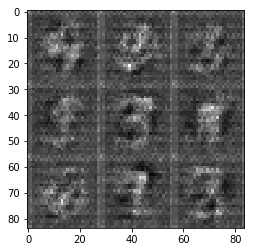

Epoch 1/2... Discriminator Loss: 1.7800... Generator Loss: 0.3088
Epoch 1/2... Discriminator Loss: 1.6838... Generator Loss: 0.3678
Epoch 1/2... Discriminator Loss: 1.7210... Generator Loss: 0.3251
Epoch 1/2... Discriminator Loss: 1.7371... Generator Loss: 0.2833
Epoch 1/2... Discriminator Loss: 1.7104... Generator Loss: 0.3233
Epoch 1/2... Discriminator Loss: 1.6800... Generator Loss: 0.3517
Epoch 1/2... Discriminator Loss: 1.6740... Generator Loss: 0.3398
Epoch 1/2... Discriminator Loss: 1.6386... Generator Loss: 0.3531
Epoch 1/2... Discriminator Loss: 1.7318... Generator Loss: 0.2995
Epoch 1/2... Discriminator Loss: 1.5278... Generator Loss: 0.4271
Epoch 1/2... Discriminator Loss: 1.5754... Generator Loss: 0.4375
Epoch 1/2... Discriminator Loss: 1.6501... Generator Loss: 0.3378
Epoch 1/2... Discriminator Loss: 1.7457... Generator Loss: 0.2779


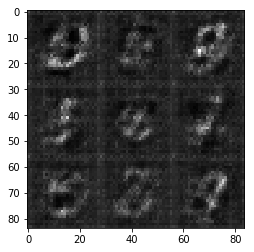

Epoch 1/2... Discriminator Loss: 1.6529... Generator Loss: 0.3305
Epoch 1/2... Discriminator Loss: 1.5425... Generator Loss: 0.4281
Epoch 1/2... Discriminator Loss: 1.5834... Generator Loss: 0.4042
Epoch 1/2... Discriminator Loss: 1.6373... Generator Loss: 0.3307
Epoch 1/2... Discriminator Loss: 1.6471... Generator Loss: 0.3275
Epoch 1/2... Discriminator Loss: 1.6257... Generator Loss: 0.3378
Epoch 1/2... Discriminator Loss: 1.6342... Generator Loss: 0.3449
Epoch 1/2... Discriminator Loss: 1.6245... Generator Loss: 0.3494
Epoch 1/2... Discriminator Loss: 1.5516... Generator Loss: 0.4053
Epoch 1/2... Discriminator Loss: 1.6612... Generator Loss: 0.3294
Epoch 1/2... Discriminator Loss: 1.6082... Generator Loss: 0.3465
Epoch 1/2... Discriminator Loss: 1.5804... Generator Loss: 0.3851


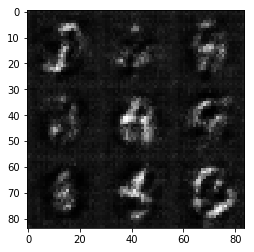

Epoch 1/2... Discriminator Loss: 1.6443... Generator Loss: 0.3369
Epoch 1/2... Discriminator Loss: 1.6442... Generator Loss: 0.3054
Epoch 1/2... Discriminator Loss: 1.5827... Generator Loss: 0.3607
Epoch 1/2... Discriminator Loss: 1.4755... Generator Loss: 0.4339
Epoch 1/2... Discriminator Loss: 1.5451... Generator Loss: 0.4080
Epoch 1/2... Discriminator Loss: 1.5940... Generator Loss: 0.3218
Epoch 1/2... Discriminator Loss: 1.7878... Generator Loss: 0.2514
Epoch 1/2... Discriminator Loss: 1.5905... Generator Loss: 0.3388
Epoch 1/2... Discriminator Loss: 1.5494... Generator Loss: 0.3670
Epoch 1/2... Discriminator Loss: 1.5627... Generator Loss: 0.3991
Epoch 1/2... Discriminator Loss: 1.5102... Generator Loss: 0.4454
Epoch 1/2... Discriminator Loss: 1.5348... Generator Loss: 0.3973
Epoch 1/2... Discriminator Loss: 1.5402... Generator Loss: 0.3620


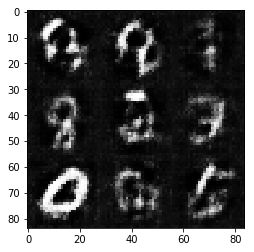

Epoch 1/2... Discriminator Loss: 1.6782... Generator Loss: 0.2878
Epoch 1/2... Discriminator Loss: 1.8288... Generator Loss: 0.2360
Epoch 1/2... Discriminator Loss: 1.6182... Generator Loss: 0.3469
Epoch 1/2... Discriminator Loss: 1.4446... Generator Loss: 0.5957
Epoch 1/2... Discriminator Loss: 1.4844... Generator Loss: 0.5576
Epoch 1/2... Discriminator Loss: 1.6496... Generator Loss: 0.4059
Epoch 1/2... Discriminator Loss: 1.7140... Generator Loss: 0.2874
Epoch 1/2... Discriminator Loss: 1.7561... Generator Loss: 0.2522
Epoch 1/2... Discriminator Loss: 1.8416... Generator Loss: 0.2326
Epoch 1/2... Discriminator Loss: 1.6409... Generator Loss: 0.3074
Epoch 1/2... Discriminator Loss: 1.6219... Generator Loss: 0.3546
Epoch 1/2... Discriminator Loss: 1.6006... Generator Loss: 0.3732


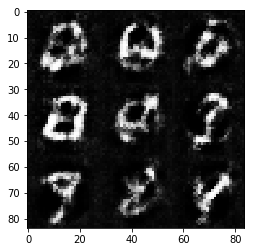

Epoch 1/2... Discriminator Loss: 1.6904... Generator Loss: 0.3195
Epoch 1/2... Discriminator Loss: 1.6371... Generator Loss: 0.3316
Epoch 1/2... Discriminator Loss: 1.6032... Generator Loss: 0.3775
Epoch 1/2... Discriminator Loss: 1.8389... Generator Loss: 0.2503
Epoch 1/2... Discriminator Loss: 1.9542... Generator Loss: 0.2040
Epoch 1/2... Discriminator Loss: 1.6618... Generator Loss: 0.3238
Epoch 1/2... Discriminator Loss: 1.5716... Generator Loss: 0.4773
Epoch 1/2... Discriminator Loss: 1.5306... Generator Loss: 0.6067
Epoch 1/2... Discriminator Loss: 1.6285... Generator Loss: 0.5616
Epoch 1/2... Discriminator Loss: 1.6201... Generator Loss: 0.4445
Epoch 1/2... Discriminator Loss: 1.7199... Generator Loss: 0.3200
Epoch 1/2... Discriminator Loss: 1.8923... Generator Loss: 0.2185
Epoch 1/2... Discriminator Loss: 1.9042... Generator Loss: 0.2180


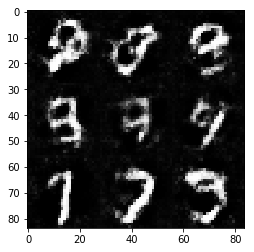

Epoch 1/2... Discriminator Loss: 1.8263... Generator Loss: 0.2469
Epoch 1/2... Discriminator Loss: 1.6995... Generator Loss: 0.2900
Epoch 1/2... Discriminator Loss: 1.6913... Generator Loss: 0.3204
Epoch 1/2... Discriminator Loss: 1.7141... Generator Loss: 0.3314
Epoch 1/2... Discriminator Loss: 1.6321... Generator Loss: 0.3909
Epoch 1/2... Discriminator Loss: 1.7349... Generator Loss: 0.3710
Epoch 1/2... Discriminator Loss: 1.8976... Generator Loss: 0.2295
Epoch 1/2... Discriminator Loss: 1.9534... Generator Loss: 0.1931
Epoch 1/2... Discriminator Loss: 1.7084... Generator Loss: 0.3114
Epoch 1/2... Discriminator Loss: 1.6438... Generator Loss: 0.4033
Epoch 1/2... Discriminator Loss: 1.6118... Generator Loss: 0.3986
Epoch 1/2... Discriminator Loss: 1.7977... Generator Loss: 0.2797


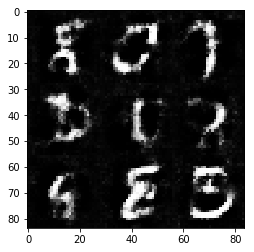

Epoch 1/2... Discriminator Loss: 1.8245... Generator Loss: 0.2653
Epoch 1/2... Discriminator Loss: 1.8141... Generator Loss: 0.2550
Epoch 1/2... Discriminator Loss: 1.9985... Generator Loss: 0.2026
Epoch 1/2... Discriminator Loss: 1.7012... Generator Loss: 0.3310
Epoch 1/2... Discriminator Loss: 1.6189... Generator Loss: 0.4167
Epoch 1/2... Discriminator Loss: 1.6250... Generator Loss: 0.4946
Epoch 1/2... Discriminator Loss: 1.6198... Generator Loss: 0.5192
Epoch 1/2... Discriminator Loss: 1.6719... Generator Loss: 0.6160
Epoch 1/2... Discriminator Loss: 1.7701... Generator Loss: 0.9066
Epoch 1/2... Discriminator Loss: 2.0627... Generator Loss: 1.2590
Epoch 1/2... Discriminator Loss: 1.9668... Generator Loss: 0.9320
Epoch 1/2... Discriminator Loss: 1.7963... Generator Loss: 0.7404
Epoch 1/2... Discriminator Loss: 1.7398... Generator Loss: 0.6665


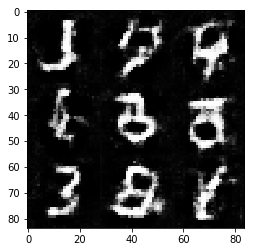

Epoch 1/2... Discriminator Loss: 1.7082... Generator Loss: 0.6865
Epoch 1/2... Discriminator Loss: 1.7748... Generator Loss: 0.8284
Epoch 1/2... Discriminator Loss: 1.7398... Generator Loss: 1.0502
Epoch 1/2... Discriminator Loss: 1.8012... Generator Loss: 0.9311
Epoch 1/2... Discriminator Loss: 1.7039... Generator Loss: 0.7084
Epoch 1/2... Discriminator Loss: 1.7442... Generator Loss: 0.7755
Epoch 1/2... Discriminator Loss: 1.6502... Generator Loss: 0.7140
Epoch 1/2... Discriminator Loss: 1.6484... Generator Loss: 0.6672
Epoch 1/2... Discriminator Loss: 1.7143... Generator Loss: 0.6969
Epoch 1/2... Discriminator Loss: 1.7630... Generator Loss: 0.8967
Epoch 1/2... Discriminator Loss: 1.9242... Generator Loss: 1.0108
Epoch 1/2... Discriminator Loss: 1.7705... Generator Loss: 0.7956


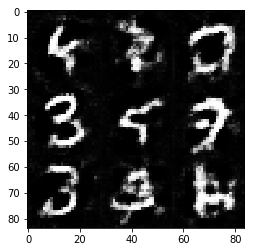

Epoch 1/2... Discriminator Loss: 1.7563... Generator Loss: 0.5919
Epoch 1/2... Discriminator Loss: 1.6512... Generator Loss: 0.4903
Epoch 1/2... Discriminator Loss: 1.7607... Generator Loss: 0.3428
Epoch 1/2... Discriminator Loss: 1.7677... Generator Loss: 0.2668
Epoch 1/2... Discriminator Loss: 1.9850... Generator Loss: 0.1994
Epoch 1/2... Discriminator Loss: 1.7476... Generator Loss: 0.2935
Epoch 1/2... Discriminator Loss: 1.6888... Generator Loss: 0.3702
Epoch 1/2... Discriminator Loss: 1.6683... Generator Loss: 0.4090
Epoch 1/2... Discriminator Loss: 1.7123... Generator Loss: 0.3776
Epoch 1/2... Discriminator Loss: 1.9620... Generator Loss: 0.2074
Epoch 1/2... Discriminator Loss: 1.7893... Generator Loss: 0.2594
Epoch 1/2... Discriminator Loss: 1.7214... Generator Loss: 0.3099
Epoch 1/2... Discriminator Loss: 1.6737... Generator Loss: 0.4063


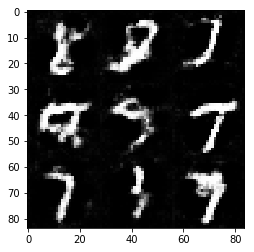

Epoch 1/2... Discriminator Loss: 1.6532... Generator Loss: 0.3840
Epoch 1/2... Discriminator Loss: 1.6953... Generator Loss: 0.3652
Epoch 1/2... Discriminator Loss: 1.6974... Generator Loss: 0.3810
Epoch 1/2... Discriminator Loss: 1.7067... Generator Loss: 0.3788
Epoch 1/2... Discriminator Loss: 1.6396... Generator Loss: 0.3785
Epoch 1/2... Discriminator Loss: 1.7237... Generator Loss: 0.3151
Epoch 1/2... Discriminator Loss: 2.0101... Generator Loss: 0.1869
Epoch 1/2... Discriminator Loss: 1.9440... Generator Loss: 0.2163
Epoch 1/2... Discriminator Loss: 1.6311... Generator Loss: 0.3701
Epoch 1/2... Discriminator Loss: 1.6449... Generator Loss: 0.4257
Epoch 1/2... Discriminator Loss: 1.6327... Generator Loss: 0.4530
Epoch 1/2... Discriminator Loss: 1.6993... Generator Loss: 0.3976


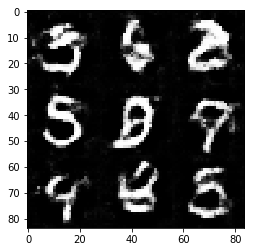

Epoch 1/2... Discriminator Loss: 1.7852... Generator Loss: 0.2742
Epoch 1/2... Discriminator Loss: 1.9493... Generator Loss: 0.2020
Epoch 1/2... Discriminator Loss: 1.7728... Generator Loss: 0.2785
Epoch 1/2... Discriminator Loss: 1.6525... Generator Loss: 0.3956
Epoch 1/2... Discriminator Loss: 1.6155... Generator Loss: 0.4020
Epoch 1/2... Discriminator Loss: 1.6584... Generator Loss: 0.3539
Epoch 1/2... Discriminator Loss: 1.7811... Generator Loss: 0.2678
Epoch 1/2... Discriminator Loss: 1.7859... Generator Loss: 0.2827
Epoch 1/2... Discriminator Loss: 1.7202... Generator Loss: 0.2978
Epoch 1/2... Discriminator Loss: 1.7513... Generator Loss: 0.3423
Epoch 1/2... Discriminator Loss: 1.6468... Generator Loss: 0.4338
Epoch 1/2... Discriminator Loss: 1.6105... Generator Loss: 0.5549
Epoch 1/2... Discriminator Loss: 1.7352... Generator Loss: 0.9717


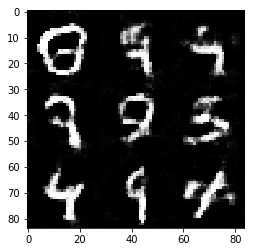

Epoch 1/2... Discriminator Loss: 1.9824... Generator Loss: 1.1369
Epoch 1/2... Discriminator Loss: 1.6702... Generator Loss: 0.8178
Epoch 1/2... Discriminator Loss: 1.7412... Generator Loss: 0.5763
Epoch 1/2... Discriminator Loss: 1.5622... Generator Loss: 0.5345
Epoch 1/2... Discriminator Loss: 1.6209... Generator Loss: 0.5431
Epoch 1/2... Discriminator Loss: 1.6583... Generator Loss: 0.6570
Epoch 1/2... Discriminator Loss: 1.7290... Generator Loss: 0.7207
Epoch 1/2... Discriminator Loss: 1.8782... Generator Loss: 1.1900
Epoch 1/2... Discriminator Loss: 1.7541... Generator Loss: 0.8414
Epoch 1/2... Discriminator Loss: 1.5796... Generator Loss: 0.6749
Epoch 1/2... Discriminator Loss: 1.6173... Generator Loss: 0.5525
Epoch 1/2... Discriminator Loss: 1.6119... Generator Loss: 0.6426


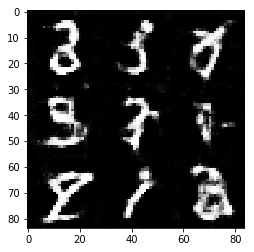

Epoch 1/2... Discriminator Loss: 1.5659... Generator Loss: 0.7501
Epoch 1/2... Discriminator Loss: 1.8385... Generator Loss: 1.1400
Epoch 1/2... Discriminator Loss: 1.6278... Generator Loss: 0.7624
Epoch 1/2... Discriminator Loss: 1.5614... Generator Loss: 0.5999
Epoch 1/2... Discriminator Loss: 1.5379... Generator Loss: 0.4626
Epoch 1/2... Discriminator Loss: 1.5859... Generator Loss: 0.4334
Epoch 1/2... Discriminator Loss: 1.7011... Generator Loss: 0.3851
Epoch 1/2... Discriminator Loss: 1.7982... Generator Loss: 0.2755
Epoch 1/2... Discriminator Loss: 2.1325... Generator Loss: 0.1566
Epoch 1/2... Discriminator Loss: 2.0906... Generator Loss: 0.1756
Epoch 1/2... Discriminator Loss: 2.0033... Generator Loss: 0.1892
Epoch 1/2... Discriminator Loss: 1.6083... Generator Loss: 0.4045
Epoch 1/2... Discriminator Loss: 1.5256... Generator Loss: 0.4791


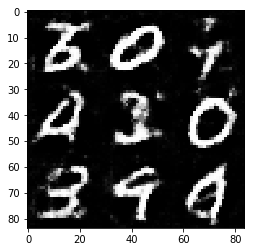

Epoch 1/2... Discriminator Loss: 1.5945... Generator Loss: 0.5306
Epoch 1/2... Discriminator Loss: 1.5096... Generator Loss: 0.6063
Epoch 1/2... Discriminator Loss: 1.6203... Generator Loss: 0.4339
Epoch 1/2... Discriminator Loss: 1.6525... Generator Loss: 0.3820
Epoch 1/2... Discriminator Loss: 1.6001... Generator Loss: 0.4971
Epoch 1/2... Discriminator Loss: 1.6351... Generator Loss: 0.4726
Epoch 1/2... Discriminator Loss: 1.5683... Generator Loss: 0.5175
Epoch 1/2... Discriminator Loss: 1.5299... Generator Loss: 0.5633
Epoch 1/2... Discriminator Loss: 1.6587... Generator Loss: 0.6823
Epoch 1/2... Discriminator Loss: 2.0515... Generator Loss: 1.1908
Epoch 1/2... Discriminator Loss: 2.0100... Generator Loss: 1.4420
Epoch 1/2... Discriminator Loss: 1.6452... Generator Loss: 0.7504


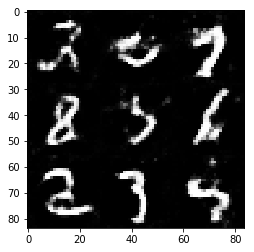

Epoch 1/2... Discriminator Loss: 1.5694... Generator Loss: 0.6180
Epoch 1/2... Discriminator Loss: 1.5944... Generator Loss: 0.4688
Epoch 1/2... Discriminator Loss: 1.5331... Generator Loss: 0.6192
Epoch 1/2... Discriminator Loss: 1.5323... Generator Loss: 0.6449
Epoch 1/2... Discriminator Loss: 1.5853... Generator Loss: 0.6116
Epoch 1/2... Discriminator Loss: 1.6106... Generator Loss: 0.7418
Epoch 1/2... Discriminator Loss: 1.9061... Generator Loss: 1.3171
Epoch 1/2... Discriminator Loss: 1.8252... Generator Loss: 1.1089
Epoch 1/2... Discriminator Loss: 1.9970... Generator Loss: 1.1673
Epoch 1/2... Discriminator Loss: 1.6385... Generator Loss: 0.8812
Epoch 1/2... Discriminator Loss: 1.5458... Generator Loss: 0.4348
Epoch 1/2... Discriminator Loss: 1.5993... Generator Loss: 0.3797
Epoch 1/2... Discriminator Loss: 1.4980... Generator Loss: 0.4703


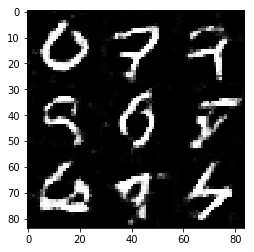

Epoch 1/2... Discriminator Loss: 1.5252... Generator Loss: 0.5501
Epoch 1/2... Discriminator Loss: 1.6144... Generator Loss: 0.6428


KeyboardInterrupt: 

In [19]:
batch_size = 128
z_dim = 128
learning_rate = 0.0003
beta1 = 0.3

# batch_size = 128
# z_dim = 256
# learning_rate = 0.0003
# beta1 = 0.7

# batch_size = 128
# z_dim = 128
# learning_rate = 0.0003
# beta1 = 0.7

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

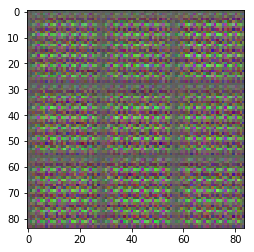

Epoch 1/1... Discriminator Loss: 2.8647... Generator Loss: 0.0880
Epoch 1/1... Discriminator Loss: 3.3739... Generator Loss: 0.0541
Epoch 1/1... Discriminator Loss: 2.9526... Generator Loss: 0.0926
Epoch 1/1... Discriminator Loss: 3.1167... Generator Loss: 0.0731
Epoch 1/1... Discriminator Loss: 3.5785... Generator Loss: 0.0434
Epoch 1/1... Discriminator Loss: 3.2832... Generator Loss: 0.0565
Epoch 1/1... Discriminator Loss: 4.0816... Generator Loss: 0.0259
Epoch 1/1... Discriminator Loss: 3.1303... Generator Loss: 0.0661
Epoch 1/1... Discriminator Loss: 3.7268... Generator Loss: 0.0483
Epoch 1/1... Discriminator Loss: 3.2471... Generator Loss: 0.0607
Epoch 1/1... Discriminator Loss: 3.3080... Generator Loss: 0.0715
Epoch 1/1... Discriminator Loss: 3.1366... Generator Loss: 0.0941


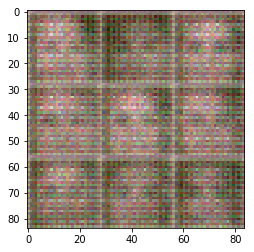

Epoch 1/1... Discriminator Loss: 3.1764... Generator Loss: 0.0741
Epoch 1/1... Discriminator Loss: 2.4819... Generator Loss: 0.1888
Epoch 1/1... Discriminator Loss: 2.3773... Generator Loss: 0.1851
Epoch 1/1... Discriminator Loss: 2.3478... Generator Loss: 0.2005
Epoch 1/1... Discriminator Loss: 2.2967... Generator Loss: 0.2117
Epoch 1/1... Discriminator Loss: 2.1547... Generator Loss: 0.2335
Epoch 1/1... Discriminator Loss: 2.2313... Generator Loss: 0.1890
Epoch 1/1... Discriminator Loss: 2.2956... Generator Loss: 0.1671
Epoch 1/1... Discriminator Loss: 2.3382... Generator Loss: 0.1603
Epoch 1/1... Discriminator Loss: 2.1562... Generator Loss: 0.2100
Epoch 1/1... Discriminator Loss: 1.9835... Generator Loss: 0.3041
Epoch 1/1... Discriminator Loss: 2.2083... Generator Loss: 0.3219
Epoch 1/1... Discriminator Loss: 2.1326... Generator Loss: 0.4594


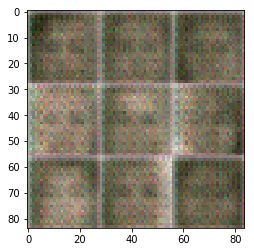

Epoch 1/1... Discriminator Loss: 2.3098... Generator Loss: 0.4796
Epoch 1/1... Discriminator Loss: 2.1392... Generator Loss: 0.5545
Epoch 1/1... Discriminator Loss: 2.1082... Generator Loss: 0.4861
Epoch 1/1... Discriminator Loss: 1.9252... Generator Loss: 0.4236
Epoch 1/1... Discriminator Loss: 2.0080... Generator Loss: 0.4240
Epoch 1/1... Discriminator Loss: 1.9813... Generator Loss: 0.3837
Epoch 1/1... Discriminator Loss: 1.9187... Generator Loss: 0.3523
Epoch 1/1... Discriminator Loss: 1.9355... Generator Loss: 0.3225
Epoch 1/1... Discriminator Loss: 1.8429... Generator Loss: 0.3824
Epoch 1/1... Discriminator Loss: 1.8232... Generator Loss: 0.4054
Epoch 1/1... Discriminator Loss: 2.0135... Generator Loss: 0.3009
Epoch 1/1... Discriminator Loss: 1.8242... Generator Loss: 0.3385


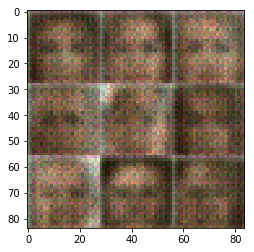

Epoch 1/1... Discriminator Loss: 1.7621... Generator Loss: 0.4396
Epoch 1/1... Discriminator Loss: 1.7819... Generator Loss: 0.4708
Epoch 1/1... Discriminator Loss: 1.7123... Generator Loss: 0.5168
Epoch 1/1... Discriminator Loss: 1.7005... Generator Loss: 0.6556
Epoch 1/1... Discriminator Loss: 1.7949... Generator Loss: 0.5702
Epoch 1/1... Discriminator Loss: 1.7643... Generator Loss: 0.5505
Epoch 1/1... Discriminator Loss: 1.7858... Generator Loss: 0.9477
Epoch 1/1... Discriminator Loss: 1.7716... Generator Loss: 1.2488
Epoch 1/1... Discriminator Loss: 1.6302... Generator Loss: 0.8875
Epoch 1/1... Discriminator Loss: 1.6315... Generator Loss: 0.7423
Epoch 1/1... Discriminator Loss: 1.6604... Generator Loss: 0.6065
Epoch 1/1... Discriminator Loss: 1.7386... Generator Loss: 0.4430
Epoch 1/1... Discriminator Loss: 1.5615... Generator Loss: 0.8059


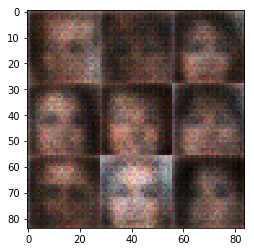

Epoch 1/1... Discriminator Loss: 1.7247... Generator Loss: 0.8499
Epoch 1/1... Discriminator Loss: 1.6828... Generator Loss: 0.8561
Epoch 1/1... Discriminator Loss: 1.7474... Generator Loss: 0.7539
Epoch 1/1... Discriminator Loss: 1.7858... Generator Loss: 0.6851
Epoch 1/1... Discriminator Loss: 1.7418... Generator Loss: 0.6359
Epoch 1/1... Discriminator Loss: 1.5395... Generator Loss: 0.5697
Epoch 1/1... Discriminator Loss: 1.6763... Generator Loss: 0.9119
Epoch 1/1... Discriminator Loss: 1.6424... Generator Loss: 2.4279
Epoch 1/1... Discriminator Loss: 1.7173... Generator Loss: 0.7812
Epoch 1/1... Discriminator Loss: 1.6822... Generator Loss: 0.5152
Epoch 1/1... Discriminator Loss: 1.6829... Generator Loss: 0.4405
Epoch 1/1... Discriminator Loss: 1.4625... Generator Loss: 0.6286


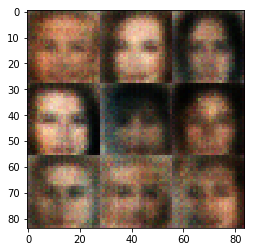

Epoch 1/1... Discriminator Loss: 1.7320... Generator Loss: 0.7631
Epoch 1/1... Discriminator Loss: 1.5626... Generator Loss: 1.0412
Epoch 1/1... Discriminator Loss: 1.4613... Generator Loss: 1.1626
Epoch 1/1... Discriminator Loss: 1.4631... Generator Loss: 0.9312
Epoch 1/1... Discriminator Loss: 1.3018... Generator Loss: 1.1525
Epoch 1/1... Discriminator Loss: 1.3639... Generator Loss: 1.2927
Epoch 1/1... Discriminator Loss: 1.2925... Generator Loss: 2.2863
Epoch 1/1... Discriminator Loss: 1.3709... Generator Loss: 0.9909
Epoch 1/1... Discriminator Loss: 1.5391... Generator Loss: 0.7394
Epoch 1/1... Discriminator Loss: 1.5606... Generator Loss: 0.4626
Epoch 1/1... Discriminator Loss: 1.9157... Generator Loss: 0.2639
Epoch 1/1... Discriminator Loss: 2.1384... Generator Loss: 0.1667
Epoch 1/1... Discriminator Loss: 1.8047... Generator Loss: 0.2978


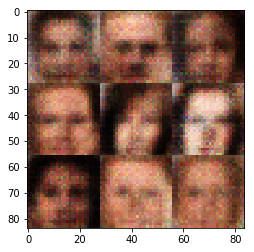

Epoch 1/1... Discriminator Loss: 1.7210... Generator Loss: 0.3539
Epoch 1/1... Discriminator Loss: 1.8814... Generator Loss: 0.2519
Epoch 1/1... Discriminator Loss: 1.7370... Generator Loss: 0.2788
Epoch 1/1... Discriminator Loss: 1.8590... Generator Loss: 0.2735
Epoch 1/1... Discriminator Loss: 1.8287... Generator Loss: 0.2699
Epoch 1/1... Discriminator Loss: 1.8890... Generator Loss: 0.2525
Epoch 1/1... Discriminator Loss: 1.4503... Generator Loss: 0.4813
Epoch 1/1... Discriminator Loss: 1.7557... Generator Loss: 0.3382
Epoch 1/1... Discriminator Loss: 1.7827... Generator Loss: 0.3341
Epoch 1/1... Discriminator Loss: 1.8691... Generator Loss: 0.2385
Epoch 1/1... Discriminator Loss: 1.6812... Generator Loss: 0.2763
Epoch 1/1... Discriminator Loss: 1.6382... Generator Loss: 0.3457


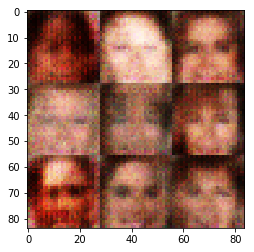

Epoch 1/1... Discriminator Loss: 1.2731... Generator Loss: 0.5805
Epoch 1/1... Discriminator Loss: 1.9465... Generator Loss: 0.2159
Epoch 1/1... Discriminator Loss: 1.7046... Generator Loss: 0.2982
Epoch 1/1... Discriminator Loss: 1.2383... Generator Loss: 0.6401
Epoch 1/1... Discriminator Loss: 1.8637... Generator Loss: 0.2381
Epoch 1/1... Discriminator Loss: 1.9144... Generator Loss: 0.2165
Epoch 1/1... Discriminator Loss: 1.8359... Generator Loss: 0.3002
Epoch 1/1... Discriminator Loss: 1.8498... Generator Loss: 0.2583
Epoch 1/1... Discriminator Loss: 1.9549... Generator Loss: 0.2028
Epoch 1/1... Discriminator Loss: 1.3359... Generator Loss: 0.6055
Epoch 1/1... Discriminator Loss: 1.4769... Generator Loss: 0.4133
Epoch 1/1... Discriminator Loss: 1.9120... Generator Loss: 0.2084
Epoch 1/1... Discriminator Loss: 1.6172... Generator Loss: 0.2822


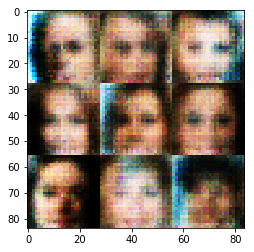

Epoch 1/1... Discriminator Loss: 1.6908... Generator Loss: 0.2890
Epoch 1/1... Discriminator Loss: 1.7561... Generator Loss: 0.2635
Epoch 1/1... Discriminator Loss: 1.9632... Generator Loss: 0.1992
Epoch 1/1... Discriminator Loss: 1.7852... Generator Loss: 0.2580
Epoch 1/1... Discriminator Loss: 1.6478... Generator Loss: 0.3357
Epoch 1/1... Discriminator Loss: 1.7269... Generator Loss: 0.2486
Epoch 1/1... Discriminator Loss: 1.5692... Generator Loss: 0.3723
Epoch 1/1... Discriminator Loss: 1.0805... Generator Loss: 0.6108
Epoch 1/1... Discriminator Loss: 1.2168... Generator Loss: 0.5468
Epoch 1/1... Discriminator Loss: 1.9439... Generator Loss: 0.1870
Epoch 1/1... Discriminator Loss: 1.8166... Generator Loss: 0.2166
Epoch 1/1... Discriminator Loss: 1.4871... Generator Loss: 0.4058


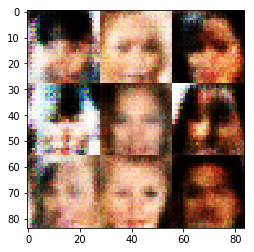

Epoch 1/1... Discriminator Loss: 1.5065... Generator Loss: 0.3938
Epoch 1/1... Discriminator Loss: 1.8200... Generator Loss: 0.2417
Epoch 1/1... Discriminator Loss: 1.8954... Generator Loss: 0.2045
Epoch 1/1... Discriminator Loss: 1.3152... Generator Loss: 0.5259
Epoch 1/1... Discriminator Loss: 0.8871... Generator Loss: 1.1818
Epoch 1/1... Discriminator Loss: 0.9195... Generator Loss: 3.2403
Epoch 1/1... Discriminator Loss: 1.1169... Generator Loss: 1.0517
Epoch 1/1... Discriminator Loss: 1.2784... Generator Loss: 0.5329
Epoch 1/1... Discriminator Loss: 1.4729... Generator Loss: 0.3967
Epoch 1/1... Discriminator Loss: 0.4311... Generator Loss: 2.8294
Epoch 1/1... Discriminator Loss: 1.0645... Generator Loss: 1.1925
Epoch 1/1... Discriminator Loss: 1.9312... Generator Loss: 0.1896
Epoch 1/1... Discriminator Loss: 1.8042... Generator Loss: 0.2473


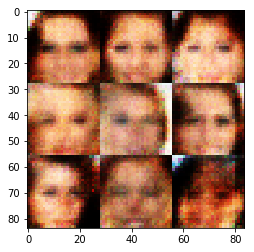

Epoch 1/1... Discriminator Loss: 1.7891... Generator Loss: 0.2418
Epoch 1/1... Discriminator Loss: 1.6576... Generator Loss: 0.2742
Epoch 1/1... Discriminator Loss: 1.4646... Generator Loss: 0.3603
Epoch 1/1... Discriminator Loss: 1.3811... Generator Loss: 0.4126
Epoch 1/1... Discriminator Loss: 1.1134... Generator Loss: 0.6460
Epoch 1/1... Discriminator Loss: 1.8071... Generator Loss: 0.2348
Epoch 1/1... Discriminator Loss: 1.5959... Generator Loss: 0.3158
Epoch 1/1... Discriminator Loss: 1.3632... Generator Loss: 0.4249
Epoch 1/1... Discriminator Loss: 1.5880... Generator Loss: 0.2922
Epoch 1/1... Discriminator Loss: 1.2240... Generator Loss: 0.4416
Epoch 1/1... Discriminator Loss: 0.9304... Generator Loss: 0.8118
Epoch 1/1... Discriminator Loss: 0.5000... Generator Loss: 2.0963


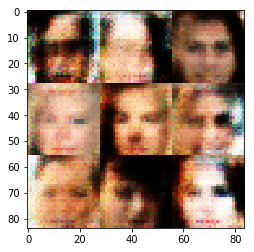

Epoch 1/1... Discriminator Loss: 0.7850... Generator Loss: 1.9733
Epoch 1/1... Discriminator Loss: 0.5931... Generator Loss: 2.0525
Epoch 1/1... Discriminator Loss: 0.8309... Generator Loss: 1.6018
Epoch 1/1... Discriminator Loss: 0.5648... Generator Loss: 1.9851
Epoch 1/1... Discriminator Loss: 0.9266... Generator Loss: 1.1009
Epoch 1/1... Discriminator Loss: 0.3856... Generator Loss: 4.3098
Epoch 1/1... Discriminator Loss: 0.7684... Generator Loss: 1.3796
Epoch 1/1... Discriminator Loss: 1.1798... Generator Loss: 0.5802
Epoch 1/1... Discriminator Loss: 2.2011... Generator Loss: 0.1393
Epoch 1/1... Discriminator Loss: 1.1863... Generator Loss: 0.4481
Epoch 1/1... Discriminator Loss: 0.8304... Generator Loss: 0.9792
Epoch 1/1... Discriminator Loss: 0.8104... Generator Loss: 1.0211
Epoch 1/1... Discriminator Loss: 0.6011... Generator Loss: 1.8937


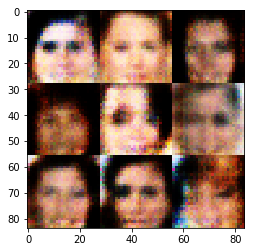

Epoch 1/1... Discriminator Loss: 0.5908... Generator Loss: 3.4658
Epoch 1/1... Discriminator Loss: 0.8038... Generator Loss: 1.0694
Epoch 1/1... Discriminator Loss: 0.9294... Generator Loss: 0.8936
Epoch 1/1... Discriminator Loss: 0.7170... Generator Loss: 1.3179
Epoch 1/1... Discriminator Loss: 0.5390... Generator Loss: 4.6797


KeyboardInterrupt: 

In [21]:
batch_size = 128
z_dim = 128
learning_rate = 0.0003
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.